In [158]:
#@title 1. Załadowanie pliku CSV, import używanych bibliotek, Pandas - ustawienie wyświetlania
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
pd.set_option('display.max_columns', None, 'display.max_rows', None)

df = pd.read_csv("http://data.insideairbnb.com/united-states/dc/washington-dc/2022-09-14/data/listings.csv.gz", sep=',')

In [120]:
#@title 2. Poznanie rozmiaru zbioru danych (liczby obserwacji i liczby zmiennych, które je opisują) i oszacowanie czasochłonności procesu analizy
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6473 entries, 0 to 6472
Columns: 75 entries, id to reviews_per_month
dtypes: float64(23), int64(17), object(35)
memory usage: 3.7+ MB


In [121]:
#@title 3. Wyświetlenie próbki surowych danych w celu wyrobienia sobie wyobrażenia o nich – poznania struktury danych i wstępnej oceny przydatności poszczególnych zmiennych
rowsToDisplay = 5 #@param {type:"integer"}
df.head(rowsToDisplay)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3686,https://www.airbnb.com/rooms/3686,20220914194735,2022-09-14,city scrape,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington, DC","I am a literary scholar, teacher, poet, vegan ...",within a day,100%,100%,f,https://a0.muscache.com/im/users/4645/profile_...,https://a0.muscache.com/im/users/4645/profile_...,Anacostia,1.0,4.0,"['email', 'phone', 'work_email']",t,t,"Washington, District of Columbia, United States",Historic Anacostia,NaN,38.863390,-76.988890,Private room in home,Private room,1,NaN,1 private bath,1.0,1.0,"[""Dryer"", ""Smoke alarm"", ""Cooking basics"", ""In...",$67.00,31,365,31.0,31.0,365.0,365.0,31.0,365.0,NaN,t,0,1,31,306,2022-09-14,81,5,0,2010-11-01,2022-07-06,4.63,4.72,4.43,4.90,4.83,3.86,4.62,NaN,f,1,0,1,0,0.56
1,841260,https://www.airbnb.com/rooms/841260,20220914194735,2022-09-15,city scrape,Metro Style Living in Washington DC,Metro Style Living in Washington DC<br /><br /...,Its a very safe neighborhood and the house is ...,https://a0.muscache.com/pictures/4261fe6f-4828...,315148,https://www.airbnb.com/users/show/315148,John,2010-12-10,"Washington, DC","My name is John and I am from Washington DC, I...",within a few hours,81%,48%,f,https://a0.muscache.com/im/pictures/user/47fcf...,https://a0.muscache.com/im/pictures/user/47fcf...,Bloomingdale,71.0,79.0,"['email', 'phone']",t,t,"Washington, District of Columbia, United States","Brightwood Park, Crestwood, Petworth",NaN,38.937190,-77.023350,Private room in rental unit,Private room,1,NaN,2 shared baths,1.0,1.0,"[""Smoke alarm"", ""Cooking basics"", ""Bed linens""...",$39.00,31,360,31.0,31.0,360.0,360.0,31.0,360.0,NaN,t,0,0,0,46,2022-09-15,14,0,0,2013-06-10,2021-04-24,4.43,4.36,3.93,4.86,4.86,4.57,4.29,NaN,f,46,0,46,0,0.12
2,3943,https://www.airbnb.com/rooms/3943,20220914194735,2022-09-15,city scrape,Historic Rowhouse Near Monuments,You will be enjoying the en-suite style space ...,This rowhouse is centrally located in the hear...,https://a0.muscache.com/pictures/6d12fcf6-1f03...,5059,https://www.airbnb.com/users/show/5059,Vasa,2008-12-12,"Washington, DC",I have been living and working in DC for the l...,within an hour,100%,76%,t,https://a0.muscache.com/im/pictures/user/8ec69...,https://a0.muscache.com/im/pictures/user/8ec69...,Eckington,4.0,4.0,"['email', 'phone']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",NaN,38.911950,-77.004560,Private room in townhouse,Private room,3,NaN,1 private bath,1.0,2.0,"[""Dryer"", 

In [159]:
#@title 4. Weryfikacja typów poszczególnych zmiennych (całkowite, zmiennoprzecinkowe, kategoryczne porządkowe, kategoryczne nominalne, zmienne typu logicznego, daty) i ich ewentualna korekta (zamiana typu string na float, interpretacja zmiennych numerycznych jako kategorii itp.)

def changeToBooleanTypeArray(inputArray):
  return inputArray.map({'t':True, 'f':False}).astype(bool)

def mapBathroomTextToBathroomNumber(bathroomText):
  if not isinstance(bathroomText, str):
    return bathroomText
  elif 'half' in bathroomText or 'Half' in bathroomText:
    return '0.5'
  else:
    return bathroomText.split()[0]

# Correct data types

#Floatpointing variables
df['bathrooms'] = df['bathrooms_text'].map(lambda x: mapBathroomTextToBathroomNumber(x)).astype(np.float64) # As I see this column is always NaN but I cant extract values from column bathrooms+text
df['price'] = df['price'].str.replace("[\$,]","", regex=True).astype(np.float64) # Change price to float64 (all values are present in $)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace("%","",regex=False).astype(np.float64).div(100) # Change acceptance rate from % value to floatpointing number
df['host_response_rate'] = df['host_response_rate'].str.replace("%","",regex=False).astype(np.float64).div(100) # Change host response rate from % value to floatpointing number

# Logical Variables
df['host_is_superhost'] = changeToBooleanTypeArray(df['host_is_superhost'])
df['host_has_profile_pic'] = changeToBooleanTypeArray(df['host_has_profile_pic'])
df['host_identity_verified'] = changeToBooleanTypeArray(df['host_identity_verified'])
df['instant_bookable'] = changeToBooleanTypeArray(df['instant_bookable'])
df['has_availability'] = changeToBooleanTypeArray(df['has_availability'])

#Date variables
df['host_since'] = pd.to_datetime(df['host_since'], format='%Y-%m-%d')
df['last_scraped'] = pd.to_datetime(df['last_scraped'], format='%Y-%m-%d')
df['calendar_last_scraped'] = pd.to_datetime(df['calendar_last_scraped'], format='%Y-%m-%d')
df['first_review'] = pd.to_datetime(df['first_review'], format='%Y-%m-%d')
df['last_review'] = pd.to_datetime(df['last_review'], format='%Y-%m-%d')

# Categorical variables
df['source'] = df['source'].astype('category')
df['host_response_time'] = df['host_response_time'].astype('category')

# Display types after correction
df.dtypes

id                                                       int64
listing_url                                             object
scrape_id                                                int64
last_scraped                                    datetime64[ns]
source                                                category
name                                                    object
description                                             object
neighborhood_overview                                   object
picture_url                                             object
host_id                                                  int64
host_url                                                object
host_name                                               object
host_since                                      datetime64[ns]
host_location                                           object
host_about                                              object
host_response_time                                    c

In [123]:
#@title 5. Zbudowanie podsumowania zmiennych numerycznych opisujących zbiór w postaci jednej tabelki.
variableType = "numeric" #@param ["numeric", "non numeric"]
if variableType == 'numeric':
  result = df.describe()
elif variableType == 'non numeric':
  result = df.describe(exclude=np.number)
result

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.473000e+03,6.473000e+03,6.473000e+03,4984.000000,5446.000000,6312.000000,6312.000000,0.0,6473.000000,6473.000000,6473.000000,6466.000000,5840.000000,6326.000000,6473.000000,6473.000000,6.473000e+03,6472.000000,6472.000000,6.472000e+03,6.472000e+03,6472.000000,6.472000e+03,0.0,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000,5295.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,6473.000000,6473.000000,6473.000000,6473.000000,5295.000000
mean,9.998362e+16,2.022091e+13,1.108218e+08,0.964326,0.886504,184.338561,234.109949,NaN,38.911996,-77.017201,3.658118,1.382230,1.579966,1.982137,179.118956,21.404758,2.202917e+03,22.285538,47.143078,2.383253e+03,1.993278e+06,45.964091,1.988764e+06,NaN,8.583964,21.943148,38.634482,175.354859,49.622895,13.954735,1.022401,4.722984,4.805506,4.758410,4.860990,4.844523,4.788137,4.704282,23.566970,20.996292,2.208713,0.253360,1.820546
std,2.316199e+17,0.000000e+00,1.301801e+08,0.117587,0.213416,781.423039,947.147984,NaN,0.029092,0.034846,2.347592,0.752574,0.967414,1.383641,271.859167,40.714477,1.242859e+05,49.987921,138.387355,1.242931e+05,6.536100e+07,134.310149,6.521312e+07,NaN,10.226261,21.379145,32.871268,134.263024,83.444752,21.674194,2.491821,0.490366,0.345542,0.358857,0.322829,0.340401,0.333470,0.383142,54.503954,54.386933,7.806500,1.893261,2.419746
min,3.571000e+03,2.022091e+13,4.492000e+03,0.000000,0.000000,1.000000,1.000000,NaN,38.809610,-77.133630,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.989388e+07,2.022091e+13,1.426450e+07,1.000000,0.890000,1.000000,1.000000,NaN,38.896060,-77.038330,2.000000,1.000000,1.000000,1.000000,86.000000,2.000000,1.200000e+02,2.000000,2.000000,3.650000e+02,3.650000e+02,2.000000,3.650000e+02,NaN,0.000000,0.000000,0.000000,41.000000,2.000000,0.000000,0.000000,4.670000,4.760000,4.680000,4.860000,4.830000,4.720000,4.640000,1.000000,1.000000,0.000000,0.000000,0.330000
50%,4.016008e+07,2.022091e+13,4.802192e+07,1.000000,0.980000,2.000000,4.000000,NaN,38.909440,-77.019470,3.000000,1.000000,1.000000,2.000000,125.000000,14.000000,7.310000e+02,10.000000,26.000000,1.125000e+03,1.125000e+03,14.000000,1.125000e+03,NaN,4.000000,17.000000,40.000000,163.000000,14.000000,3.000000,0.000000,4.850000,4.910000,4.870000,4.960000,4.950000,4.900000,4.800000,2.000000,1.000000,0.000000,0.000000,1.160000
75%,5.135118e+07,2.022091e+13,1.575011e+08,1.000000,1.000000,10.000000,15.000000,NaN,38.925190,-76.995880,4.000000,1.500000,2.000000,2.000000,199.000000,31.000000,1.125000e+03,31.000000,31.000000,1.125000e+03,1.125000e+03,31.000000,1.125000e+03,NaN,15.000000,40.000000,69.000000,314.000000,60.000000,21.000000,1.000000,4.960000,5.000000,4.980000,5.000000,5.000000,5.000000,4.910000,9.000000,4.000000,1.000000,0.000000,2.680000
max,7.151515e+17,2.022091e+13,4.788802e+08,1.000000,1.000000,4057.000000,7013.000000,NaN,39.0

In [161]:
#@title 6. Sprawdzenie, czy w zbiorze występują braki danych.

result = df.isnull().sum().sort_values(ascending=False)
result[result > 0]

neighbourhood_group_cleansed    6473
calendar_updated                6473
license                         3323
host_about                      2404
neighbourhood                   2041
neighborhood_overview           2041
host_response_rate              1489
host_response_time              1489
review_scores_value             1202
review_scores_location          1202
review_scores_communication     1202
review_scores_checkin           1202
review_scores_cleanliness       1202
review_scores_accuracy          1202
reviews_per_month               1178
first_review                    1178
last_review                     1178
review_scores_rating            1178
host_acceptance_rate            1027
host_location                   1003
host_neighbourhood               680
bedrooms                         633
host_listings_count              161
host_name                        161
host_since                       161
host_picture_url                 161
host_total_listings_count        161
h

Kurtosis: 23.478454182176083
Skewness: 3.1971526713522294
Histogram:


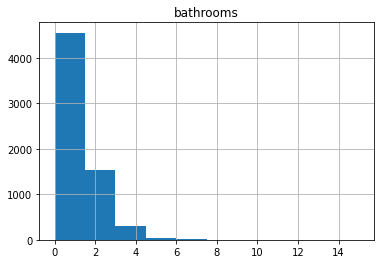

In [160]:
#@title 7. Wizualizacja rozkładu (wybranych) zmiennych
column = "bathrooms" #@param ["price", "bathrooms", "reviews_per_month", "beds"]
df.hist(column)
print(f'Kurtosis: {df[column].kurt()}')
print(f'Skewness: {df[column].skew()}')
print('Histogram:')

In [162]:
#@title 8.a. Uzupełnienie brakujących danych (np. wartością stałą, średnią/medianą/modą dla całego zbioru lub dla podzbiorów według kategorii, poprzez interpolację itp.), usunięcie wierszy/kolumn, zawierających zbyt wiele braków danych
def fillNullsWithValue(df, columnName, value):
  df[columnName].fillna(value, inplace=True)

def fillNullsWithMode(df, columnName):
  mode = df[columnName].mode()[0]
  df[columnName].fillna(mode, inplace=True)

def fillNullsWithMean(df, columnName):
  mean = df[columnName].mean()
  df[columnName].fillna(mean, inplace=True)

def fillNullsWithOtherColumn(df, columnNameToFill, sourceColumn):
  df[columnNameToFill].fillna(df[sourceColumn], inplace=True)


thresh = 7 #@param {type:"number"}
df.dropna(axis=1,how='all', inplace=True) # Delete empty columns
thresh = df.columns.size - thresh
df.dropna(thresh=thresh, inplace=True) # Delete rows under threshold
fillNullsWithValue(df, 'host_is_superhost', False) # set superhost to false when data not present
fillNullsWithMode(df, 'bathrooms') # set bathrooms with mode
fillNullsWithMode(df, 'bathrooms_text') # set bathrooms with mode
fillNullsWithMode(df, 'host_neighbourhood') # set host_neighbourhood with mode
fillNullsWithMode(df, 'host_response_time') # set host_response_time with mode        
fillNullsWithMean(df, 'host_acceptance_rate') # set host_acceptance_rate with mean
fillNullsWithMean(df, 'host_response_rate') # set host_response_rate with mean
fillNullsWithOtherColumn(df, 'description', 'neighborhood_overview') # fill with neighborhood overview
fillNullsWithOtherColumn(df, 'neighborhood_overview', 'description') # fill with description

# Otherwise set with name
fillNullsWithOtherColumn(df, 'description', 'name')
fillNullsWithOtherColumn(df, 'neighborhood_overview', 'name')

fillNullsWithOtherColumn(df, 'beds', 'bathrooms') # fill beds with bathrooms
fillNullsWithOtherColumn(df, 'bedrooms', 'bathrooms') # fill bedrooms with bathrooms
fillNullsWithValue(df, 'bathrooms', 0)
fillNullsWithValue(df, 'bathrooms_text', '0 baths')
fillNullsWithValue(df, 'license', 'No license')

fillNullsWithOtherColumn(df, 'host_neighbourhood', 'neighbourhood')
fillNullsWithOtherColumn(df, 'neighbourhood', 'host_neighbourhood')
fillNullsWithOtherColumn(df, 'neighbourhood', 'host_location')
fillNullsWithOtherColumn(df, 'host_location', 'neighbourhood')
fillNullsWithValue(df, 'host_about', 'No personal information')

In [163]:
#@title 8.b. Przycięcie odstających wartości (Współczynnik dla Z score ustawiłem 3.0)
df_zscore = (df.select_dtypes(include=np.number) - df.mean(numeric_only=True))/df.std(numeric_only=True)
df_to_delete = df[(df_zscore < -3.0) | (df_zscore > 3.0)].dropna(thresh=1).index
df.drop(df_to_delete, inplace=True)

Text(0.5, 1.0, 'Spearman Correlation')

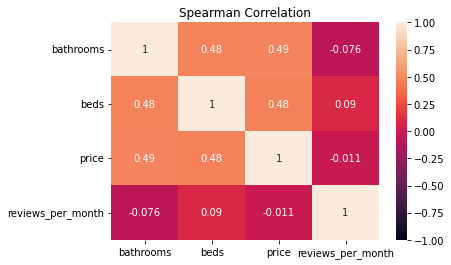

In [164]:
#@title 9.a. Obliczenie macierzy korelacji pomiędzy zmiennymi numerycznymi i zwizualizowanie ich za pomocą wykresów punktowych lub tzw. wykresów par zmiennych. Im wyższy współczynnik macieży tym większa korelacja danych (1 pełna zawsze taka sama dla tych samych kolumn). Ale na przykładzie macierzy można wywnioskować, że wartości reviews_per_month z ceną nie mają żadnej korelacji. Natomiast cena z ilością łazienek już zauważalną.
first = "bathrooms" #@param ["host_id", "host_response_rate", "host_acceptance_rate", "host_listings_count", "host_total_listings_count", "latitude", "longitude", "accommodates", "bathrooms", "bedrooms", "beds", "price", "minimum_nights", "maximum_nights", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "availability_30", "availability_60", "availability_90", "availability_365", "number_of_reviews", "number_of_reviews_ltm", "number_of_reviews_l30d", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "calculated_host_listings_count", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms", "calculated_host_listings_count_shared_rooms", "reviews_per_month"]
second = "beds" #@param ["host_id", "host_response_rate", "host_acceptance_rate", "host_listings_count", "host_total_listings_count", "latitude", "longitude", "accommodates", "bathrooms", "bedrooms", "beds", "price", "minimum_nights", "maximum_nights", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "availability_30", "availability_60", "availability_90", "availability_365", "number_of_reviews", "number_of_reviews_ltm", "number_of_reviews_l30d", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "calculated_host_listings_count", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms", "calculated_host_listings_count_shared_rooms", "reviews_per_month"]
third = "price" #@param ["host_id", "host_response_rate", "host_acceptance_rate", "host_listings_count", "host_total_listings_count", "latitude", "longitude", "accommodates", "bathrooms", "bedrooms", "beds", "price", "minimum_nights", "maximum_nights", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "availability_30", "availability_60", "availability_90", "availability_365", "number_of_reviews", "number_of_reviews_ltm", "number_of_reviews_l30d", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "calculated_host_listings_count", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms", "calculated_host_listings_count_shared_rooms", "reviews_per_month"]
fourth = "reviews_per_month" #@param ["host_id", "host_response_rate", "host_acceptance_rate", "host_listings_count", "host_total_listings_count", "latitude", "longitude", "accommodates", "bathrooms", "bedrooms", "beds", "price", "minimum_nights", "maximum_nights", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "availability_30", "availability_60", "availability_90", "availability_365", "number_of_reviews", "number_of_reviews_ltm", "number_of_reviews_l30d", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "calculated_host_listings_count", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms", "calculated_host_listings_count_shared_rooms", "reviews_per_month"]

df_to_corr = pd.DataFrame({first: df[first], second: df[second], third: df[third], fourth: df[fourth]})
corr = df_to_corr.corr(method = 'spearman')
heatmap = sns.heatmap(df_to_corr.corr(), vmin=-1, vmax=1, annot=True)
plt.title("Spearman Correlation")

In [165]:
#@title 9.B. Obliczenie współczynnika V Crammera. Przykładowy wniosk: Zmienne kategoryczne source i host_reposne_time mają znikomy współczynnik korelacji.
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

cramers_v(df['source'], df['host_response_time'])

0.13069681410971193

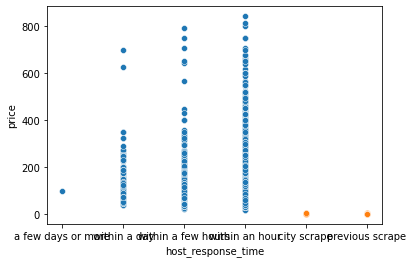

In [174]:
#@title 9.B. Wizualizacja
sns.scatterplot(x="host_response_time", y="price", data=df);
sns.scatterplot(x="source", y="beds", data=df);